# IMDB Movie Ratings- Data Analysis
Finding the trend of movies ratings over the time and are there different trends in different genres.
Data is taken from Kaggle

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movies = pd.read_parquet('imdb/movies.parquet')

In [4]:
movies.head()

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,None,None,None,NaN,1.0,2.0
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,None,None,NaN,7.0,7.0
tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",None,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,None,None,None,NaN,5.0,2.0
tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,None,None,NaN,25.0,3.0
tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,None,None,None,NaN,31.0,14.0


In [5]:
# Actor data
names = pd.read_parquet('imdb/names.parquet')
names.head()

,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
imdb_name_id,,,,,,,,,,,,,,,,
nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2,0,1,2
nm0000002,Lauren Bacall,Betty Joan Perske,174.0,Lauren Bacall was born Betty Joan Perske on Se...,"September 16, 1924 in The Bronx, New York City...",1924-09-16,"The Bronx, New York City, New York, USA","August 12, 2014 in New York City, New York, US...",2014-08-12,"New York City, New York, USA",stroke,Jason Robards (4 July 1961 - 10 September 196...,2,1,2,3
nm0000003,Brigitte Bardot,Brigitte Bardot,166.0,"Brigitte Bardot was born on September 28, 1934...","September 28, 1934 in Paris, France",1934-09-28,"Paris, France",None,None,None,None,Bernard d'Ormale (16 August 1992 - present)\n...,4,3,1,1
nm0000004,John Belushi,John Adam Belushi,170.0,"John Belushi was born in Chicago, Illinois, US...","January 24, 1949 in Chicago, Illinois, USA",1949-01-24,"Chicago, Illinois, USA","March 5, 1982 in Hollywood, Los Angeles, Calif...",1982-03-05,"Hollywood, Los Angeles, California, USA",acute cocaine and heroin intoxication,Judith Belushi-Pisano (31 December 1976 - 5 M...,1,0,0,0
nm0000005,Ingmar Bergman,Ernst Ingmar Bergman,179.0,"Ernst Ingmar Bergman was born July 14, 1918, t...","July 14, 1918 in Uppsala, Uppsala län, Sweden",1918-07-14,"Uppsala, Uppsala län, Sweden","July 30, 2007 in Fårö, Gotlands län, Sweden (...",2007-07-30,"Fårö, Gotlands län, Sweden",natural causes,Ingrid Bergman (11 November 1971 - 20 May 199...,5,4,5,8


In [6]:
#Ratings Data
ratings = pd.read_parquet('imdb/ratings.parquet')
ratings.head()

,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,103,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,32,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,117,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,169,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [7]:
# Table connecting the movies table with names table
connector = pd.read_parquet('imdb/title_principals.parquet')
connector.head()

,ordering,imdb_name_id,category,job,characters
imdb_title_id,,,,,
tt0000009,1,nm0063086,actress,None,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
tt0000009,2,nm0183823,actor,None,"[""Mr. Hamilton""]"
tt0000009,3,nm1309758,actor,None,"[""Chauncey Depew - the Director of the New Yor..."
tt0000009,4,nm0085156,director,None,None
tt0000574,1,nm0846887,actress,None,"[""Kate Kelly""]"


### Connecting the tables

In [9]:

combined_data = movies.join(connector).join(names, on='imdb_name_id')
combined_data.head()

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,"Lexington, Missouri, USA","August 19, 1951 in Forest Hills, New York, USA",1951-08-19,"Forest Hills, New York, USA",None,None,0.0,0.0,0.0,0.0
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,"Worcester, Massachusetts, USA","April 20, 1933 in Rye, New York, USA (severe ...",1933-04-20,"Rye, New York, USA",severe cold and heart weakness,Virginia Harned (1913 - 20 April 1933) (his d...,1.0,0.0,0.0,0.0
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,"Peekskill, New York, USA","April 5, 1928 in New York City, New York, USA",1928-04-05,"New York City, New York, USA",None,May Palmer (27 December 1901 - 5 April 1928) ...,2.0,0.0,1.0,1.0
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,"Brooklyn, New York, USA","May 8, 1940 in New York City, New York, USA",1940-05-08,"New York City, New York, USA",None,None,0.0,0.0,0.0,0.0
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,...,Australia,None,None,None,None,None,0.0,0.0,0.0,0.0


#### Dropping values from year 2020 as it has incomplete data

In [20]:
movies = movies.drop(movies[movies['year'] == 2020].index )
movies['year'] == 2020

imdb_title_id
tt0000009    False
tt0000574    False
tt0001892    False
tt0002101    False
tt0002130    False
             ...  
tt9905462    False
tt9906644    False
tt9911774    False
tt9914286    False
tt9914942    False
Name: year, Length: 85066, dtype: bool

<AxesSubplot:xlabel='year'>

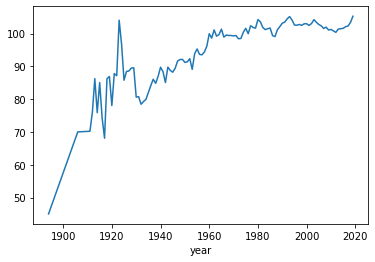

In [19]:
#Visualizing change in movie duration time
movies.groupby('year').mean()['duration'].plot()

Duration of movies has been increased but after year 1980 has been nearly constant 

### Splitting genre column in individual genres

In [21]:
data = movies.copy()
data['genre'] = data['genre'].str.split(',')
data = data.explode('genre')
data['genre'] = data['genre'].str.strip()
# Sorting average vote genre-wise
data.groupby('genre').mean().sort_values('avg_vote', ascending=False)

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
genre,,,,,,,
Documentary,2000.000000,88.500000,7.300000,615.500000,NaN,9.000000,11.500000
Film-Noir,1949.162896,84.914027,6.644042,4225.921569,85.850000,43.099548,22.134351
Biography,1995.145285,114.005947,6.630246,21934.624469,61.805729,79.610470,55.524965
History,1988.687445,117.159789,6.545698,10521.493415,62.642686,51.065094,32.189009
War,1978.182472,106.418876,6.436674,7851.116854,62.989437,39.628267,21.771930
News,2015.000000,82.000000,6.400000,105.000000,NaN,3.000000,3.000000
Animation,2002.915406,87.358223,6.383412,22215.522684,62.050740,62.632251,41.654015
Musical,1972.067747,109.171821,6.248257,3882.154148,60.212291,32.013376,14.632665
Music,1987.294925,100.115224,6.247104,8998.649552,57.717949,47.485679,31.655446


Documentary genre has highest ratings but only two movies are in documentary genre

### Yearwise ratings

Text(0, 0.5, 'Avg_Rating')

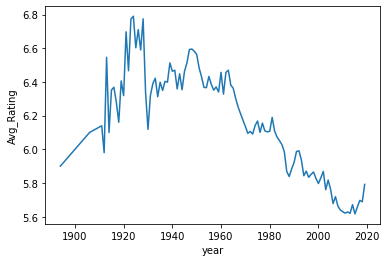

In [28]:
movie= movies.groupby('year').mean()['avg_vote'].plot()
movie.set_ylabel('Avg_Rating')

Average ratings is decreasing over the years

<AxesSubplot:xlabel='year'>

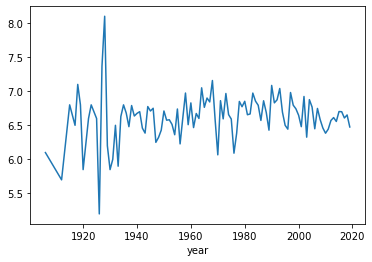

In [33]:
data[data['genre'] == 'Biography'].groupby('year').mean()['avg_vote'].plot()

Average rating is nearly same for genre Biography

### Splitting data

In [34]:
all_df = movies.groupby('year').mean()
bio_df = data[data['genre'] == 'Biography'].groupby('year').mean()

x_all = pd.DataFrame(all_df.index)
y_all = all_df['avg_vote']

x_bio = pd.DataFrame(bio_df.index)
y_bio = bio_df['avg_vote']

### Using Linear Regression to see the trend

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_all = LinearRegression()
lin_all.fit(x_all, y_all)

lin_bio = LinearRegression()
lin_bio.fit(x_bio, y_bio)


LinearRegression()

Text(0, 0.5, 'Avg. Rating')

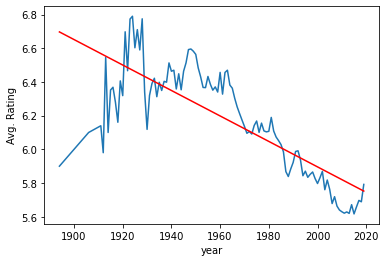

In [38]:
 #Plotting with linear Regression
ax = all_df['avg_vote'].plot()
ax.plot(all_df.index, lin_all.predict(x_all), c='r')
ax.set_ylabel('Avg. Rating')

Text(0.5, 1.0, 'Average Rating for Biography Genre')

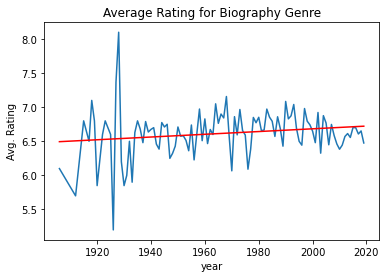

In [40]:
ax = bio_df['avg_vote'].plot()
ax.plot(bio_df.index, lin_bio.predict(x_bio), c='r')
ax.set_ylabel('Avg. Rating')
ax.set_title('Average Rating for Biography Genre')

### Does it really means that , recent movies are bad!

Text(0, 0.5, 'Number of movies')

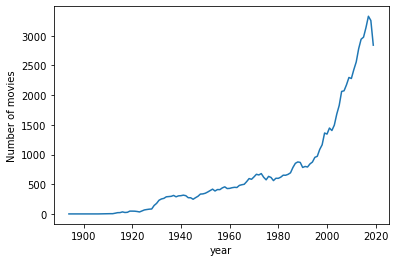

In [44]:
#Counting number of movies each year
graph = movies.groupby('year').count()['title'].plot()
graph.set_ylabel('Number of movies')


Number of movies has been increasing over the year
### Does only more number of movies affecting the bad ratings !

Text(0, 0.5, 'Average number of votes')

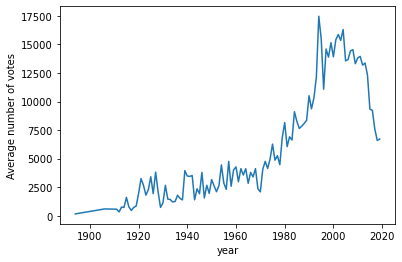

In [47]:
graph = movies.groupby('year').mean()['votes'].plot()
graph.set_ylabel('Average number of votes')

Average number of votes also increased over the years

#### Newer movies are getting worse
##### - But there are more movies
##### - Movies include at least 100 ratings
##### - Newer movie getting more votes
##### - Difficult to know if more votes gives a better evalution?